### Chapter 3 Matplotlib Data Visualization

Exercise 3

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import ticker
import statsmodels.formula.api as smf

In [2]:
src_file = Path.cwd() / '..' / 'code' / 'data' / 'raw' / 'EPA_fuel_economy.csv'
image_dir = Path.cwd() / '..' / 'code' / 'images'

In [3]:
df = pd.read_csv(src_file)
df.head()

,make,model,year,cylinders,trany,displ,VClass,co2,barrels08,fuelCost08,fuelType,highway08,city08,comb08
0,Acura,NSX,2000,6.0,Automatic 4-spd,3.0,Two Seaters,-1,18.311667,2600,Premium,22,15,18
1,Acura,NSX,2000,6.0,Manual 6-spd,3.2,Two Seaters,-1,18.311667,2600,Premium,22,15,18
2,BMW,M Coupe,2000,6.0,Manual 5-spd,3.2,Two Seaters,-1,17.347895,2500,Premium,23,17,19
3,BMW,Z3 Coupe,2000,6.0,Automatic 4-spd,2.8,Two Seaters,-1,17.347895,2500,Premium,24,17,19
4,BMW,Z3 Coupe,2000,6.0,Manual 5-spd,2.8,Two Seaters,-1,17.347895,2500,Premium,24,17,19


In [4]:
avg_by_year = df.groupby(['year'], as_index=False).agg({'fuelCost08': 'mean'}).round(2)
avg_by_year

,year,fuelCost08
0,2000,2184.94
1,2001,2201.48
2,2002,2229.38
3,2003,2273.99
4,2004,2264.57
5,2005,2271.01
6,2006,2287.00
7,2007,2284.15
8,2008,2285.68
9,2009,2183.23


In [7]:
mpg_model = smf.ols("fuelCost08 ~ year", data=avg_by_year).fit()

In [8]:
mpg_model.fittedvalues

0     2325.850476
1     2303.716333
2     2281.582190
3     2259.448048
4     2237.313905
5     2215.179762
6     2193.045619
7     2170.911476
8     2148.777333
9     2126.643190
10    2104.509048
11    2082.374905
12    2060.240762
13    2038.106619
14    2015.972476
15    1993.838333
16    1971.704190
17    1949.570048
18    1927.435905
19    1905.301762
20    1883.167619
dtype: float64

In [9]:
mpg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             fuelCost08   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     73.69
Date:                Fri, 28 Mar 2025   Prob (F-statistic):           5.79e-08
Time:                        16:06:47   Log-Likelihood:                -118.43
No. Observations:                  21   AIC:                             240.9
Df Residuals:                      19   BIC:                             242.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.659e+04   5182.756      8.990      0.000    3.57e+04    5.74e+04
year         -22.1341      2.578     -8.584      0.000     -27.531     -16.737
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   0.286
Prob(Omnibus):                  0.986   Jarque-Bera (JB):                0.137
Skew:                           0.063   Prob(JB):                        0.934
Kurtosis:                       2.624   Cond. No.                     6.67e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.67e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

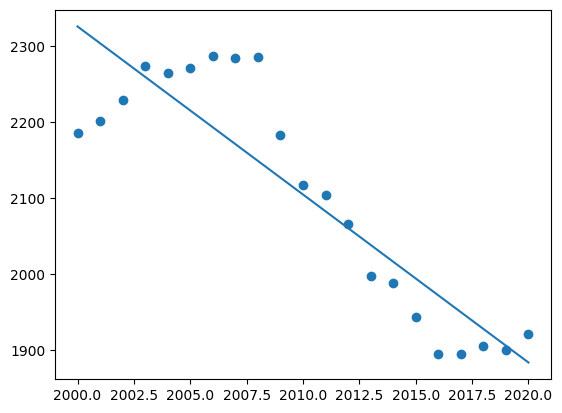

In [10]:
fig, ax = plt.subplots()
ax.scatter(x=avg_by_year['year'], y=avg_by_year['fuelCost08'])
ax.plot(avg_by_year['year'], mpg_model.fittedvalues);

(1800.0, 2200.0)

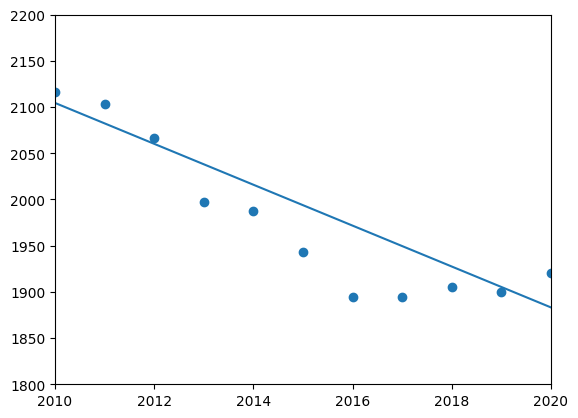

In [12]:
fig, ax = plt.subplots()
ax.scatter(x=avg_by_year['year'], y=avg_by_year['fuelCost08'])
ax.plot(avg_by_year['year'], mpg_model.fittedvalues)
ax.set_xlim((2010,2020))
ax.set_ylim((1800,2200))

In [13]:
df_2010 = df.query('year >= 2010').copy()
avg_fuel_cost = df_2010['fuelCost08'].mean().round(0)
avg_fuel_cost

1970.0

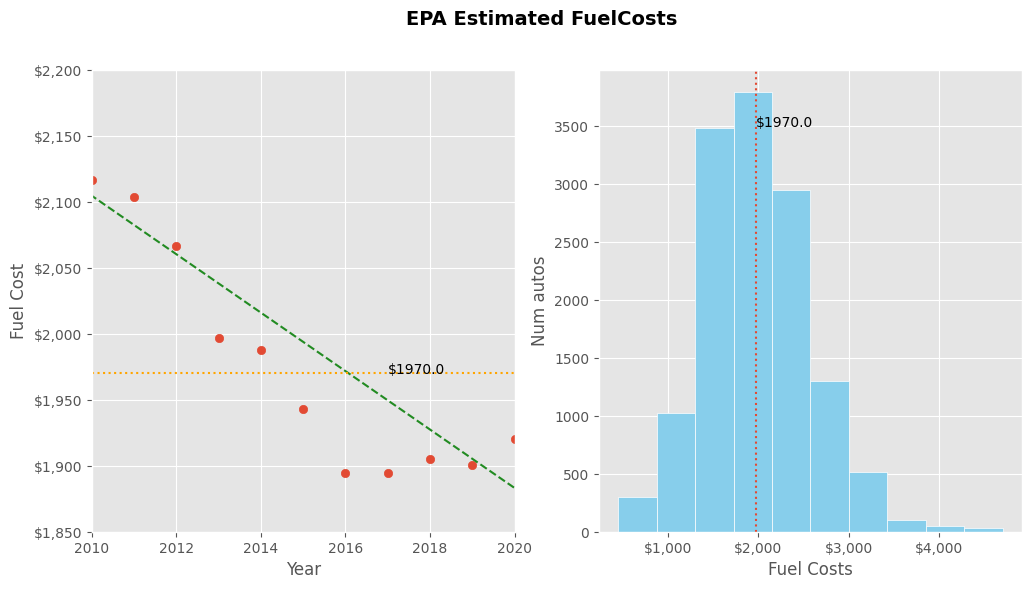

In [16]:
mpl.style.use('ggplot')
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

ax1.scatter(x=avg_by_year['year'], y=avg_by_year['fuelCost08'])
ax1.plot(avg_by_year['year'], mpg_model.fittedvalues, color='forestgreen', linestyle='--')
ax1.set(xlabel='Year', ylabel='Fuel Cost', ylim=(1850, 2200), xlim=(2010, 2020))
ax1.yaxis.set_major_formatter('${x:,.0f}')
ax1.axhline(avg_fuel_cost, linestyle=':', color='orange')
ax1.annotate(f'${avg_fuel_cost}', xy=(2017, avg_fuel_cost))

ax2.hist(df_2010['fuelCost08'], color="skyblue", ec="white")
ax2.xaxis.set_major_formatter('${x:,.0f}')
ax2.set(xlabel='Fuel Costs', ylabel='Num autos')
ax2.axvline(avg_fuel_cost, linestyle=':')
ax2.annotate(f'${avg_fuel_cost}', xy=(avg_fuel_cost, 3500))

fig.suptitle('EPA Estimated FuelCosts', weight='bold', size=14)
fig.savefig(image_dir/'line_hist.svg', transparent=False, dpi=200, bbox_inches="tight")